In [1]:
import googlemaps


In [2]:
from datetime import datetime


In [6]:
with open ("apikey.txt", 'r') as k:
    api= k.read()
gmaps= googlemaps.Client(api)

In [49]:
citylist= []
cities = ["Austin","Boston", "Detroit","Chicago", "Houston", "Dallas, TX","Omaha", "Fort Collins, CO", "Miami, FL","Kansas City, MO"]
for i in cities:
    direction_results= gmaps.directions(i, "New York", units = "metric")
    citylist.append(direction_results[0]["legs"][0]["distance"])
for i in range(0,len(citylist)):
    print('The distance between ' +  cities[i] + ' and ' + " New York, NY" + ' is ' + citylist[i]["text"])

The distance between Austin and  New York, NY is 2,806 km
The distance between Boston and  New York, NY is 349 km
The distance between Detroit and  New York, NY is 1,006 km
The distance between Chicago and  New York, NY is 1,283 km
The distance between Houston and  New York, NY is 2,627 km
The distance between Dallas, TX and  New York, NY is 2,492 km
The distance between Omaha and  New York, NY is 2,016 km
The distance between Fort Collins, CO and  New York, NY is 2,839 km
The distance between Miami, FL and  New York, NY is 2,053 km
The distance between Kansas City, MO and  New York, NY is 1,918 km


In [17]:
import quandl

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

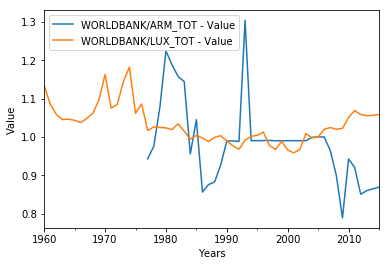

In [21]:
with open ("qkey.txt",'r') as m:
    apikey = m.read()
tradedata = quandl.get(['WORLDBANK/ARM_TOT','WORLDBANK/LUX_TOT'], authtoken = apikey)

tradedata.plot()
plt.xlabel("Years")
plt.ylabel("Value")
plt.show()

In [27]:
Arm_data=quandl.get("WORLDBANK/ARM_TOT", authtoken=apikey)
order = Arm_data.sort_values(by='Value', ascending=0)
maximum=order['Value'][1]
print "2nd highest value for Armenia is  " + str(maximum)

2nd highest value for Armenia is  1.22417921215


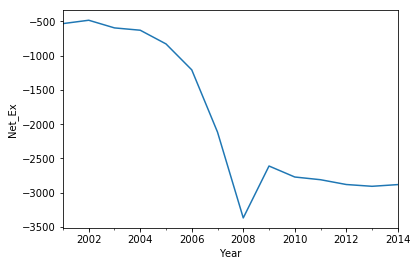

In [37]:
exp = quandl.get("WTO/MERCH_EXP_ARM", authtoken=apikey)
imp = quandl.get("WTO/MERCH_IMP_ARM", authtoken=apikey)
Net = exp ["Value"]-imp["Value"]
Net.plot()
plt.ylabel("Net_Ex")

                  EOD/AAPL - Close  EOD/NKE - Close  EOD/MCD - Close
EOD/AAPL - Close          1.000000         0.370220         0.567543
EOD/NKE - Close           0.370220         1.000000         0.319673
EOD/MCD - Close           0.567543         0.319673         1.000000


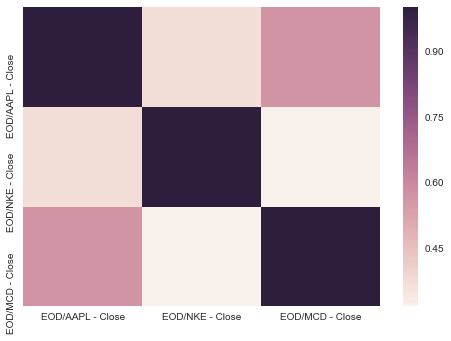

In [45]:
prices = quandl.get (["EOD/AAPL","EOD/NKE","EOD/MCD"], authtoken = apikey,trim_start= "2000-1-1", column_index = 4)
correlation = prices.corr()
print (correlation)
import seaborn as sns
sns.heatmap(prices.corr())